### Group members:
- Chang Liu
- ZiHeng Chen
- Xuan Thi Ngo 

### Analytic Computing Class 2020

# <font size =18> <center> <span style="color:lightpink"> Project 1 - Music </span> <center> </font>

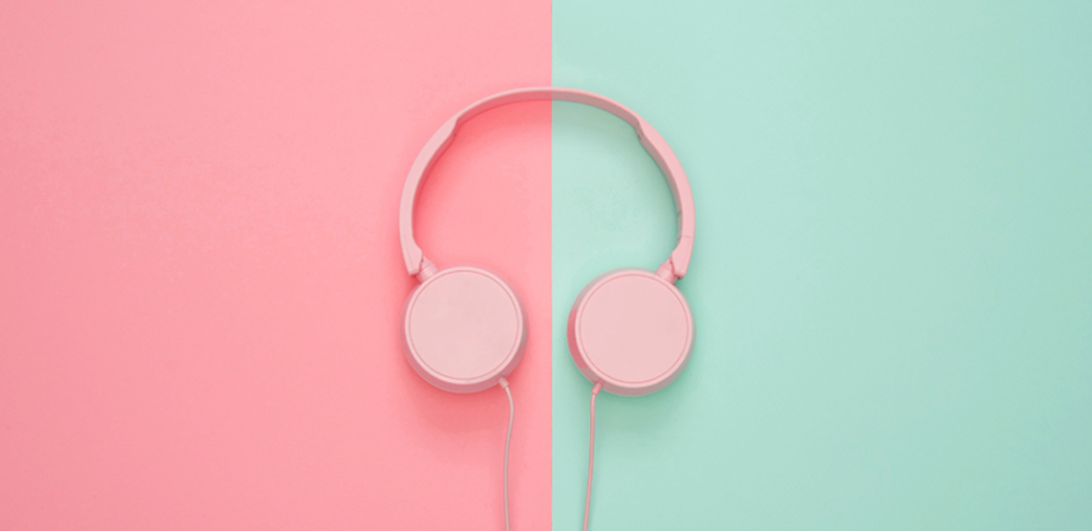

# Table of Contents
* [A. Exploratory Data Analysis](#A)
    * [1. Objective of the Proposed Research](#Objective)

    * [2. Data Exploration](#data_exploration)
    
    * [3. Data Cleaning](#data_cleaning)

    * [4. Adaptation](#adaptation)

* [B. Visualization](#B)
    * [ 5. Descriptive Visualization](#Descriptive)
    
* [C. Linear Regression](#C)
     * [6. Explore Correlations](#explore)
     * [7. Response Variable](#response)
     * [8. Simple Linear Regression](#simple)
     * [9. Multiple Linear Regression](#multiple)
     
* [D. Findings](#D)
    * [10. Project Report](#project)
    
* [E. Originality](#E)
     

# A. Exploratory Data Analysis <a class="anchor" id="A"></a> 
  
     

## 1. Objective of the Proposed Research <a class="anchor" id="Objective"></a>


In this project, we will analyze the data named `top50.csv`. The dataset displaces the top 50 most listened songs in 2019 in the world by Spotify. It is available at Kaggle https://www.kaggle.com/leonardopena/top50spotify2019. Data were stracted from http://organizeyourmusic.playlistmachinery.com/. 


The stakeholders in this project are music producers, composers, singers, and especially music companies. We focus on building a model that predicts the trend of the songs in the future. The results somehow will help them to know **what other music features affect the song's popularity?**. To complete this mission, we use R-language to get the following criteria. 

First of all, we find the correlation between each independent variable, such as **Beats.Per.Minute**, **Energy**, **Danceability**, **Loudness.dB.**, **Liveness**, **Valence.**, **Length.**, **Acousticness**, **Speechiness.**, **genre** and the dependent variable **Popularity**.  Secondly, we may think of using appropriate machine Linear Regression to see patterns in the data. To be specific, in this case, we will try with 5 different Simple Linear Regression models and some Multiple Linear Regression models, to see which ones will give us the best model to predict the future music trend. Finally, we will provide some useful recommendations to music producers, composers, and singers to have a good plan for their music using our results.   

## 2. Data Exploration<a class="anchor" id="data_exploration"></a>

In [45]:
#Load Athlete_events file
df <- read.csv('top50.csv', stringsAsFactors=FALSE, fileEncoding="latin1")
head(df)



X,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84


In [46]:
#Print out number of rows 
cat('There are', nrow(df), 'rows in this data. ')

There are 50 rows in this data. 

In [47]:
#Print out number of columns
cat('There are', ncol(df), 'columns in this data.')


There are 14 columns in this data.

In [48]:
#Print out the columns names helps us to select it later 
colnames(df)

[1] "X"                "Track.Name"       "Artist.Name"      "Genre"           
 [5] "Beats.Per.Minute" "Energy"           "Danceability"     "Loudness..dB.."  
 [9] "Liveness"         "Valence."         "Length."          "Acousticness.."  
[13] "Speechiness."     "Popularity"

Detail columns names: 

1. **X**: index
2. **Track.Name**:  Name of the Track
3. **Artist.Name**: Name of the Artist
4. **Genre**: The genre of the track
5. **Beats.Per.Minute**: The tempo of the song
6. **Energy**: The energy of a song - a perceptual measure of intensity and activity. the higher the value, the more energetic.
7. **Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements. The higher the value, the easier it is to dance to this song.
8. **Loudness..dB..**: The overall loudness of a track in decibels (dB). The higher the value, the louder the song. 
9. **Liveness**: The higher the value, the more likely the song is a live recording.
10. **Valence.**: The higher the value, the more positive mood for the song.
11. **Length.**: The duration of the song in Second.
12. **Acousticness..**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. The higher the value the more acoustic the song is.
13. **Speechiness.**: shows the presence of spoken words in a track. The higher the value the more spoken word the song contains.
14. **Popularity**: The higher the value the more popular the song is.


In [49]:
#Using str() 
str(df)

'data.frame':	50 obs. of  14 variables:
 $ X               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Track.Name      : chr  "Senorita" "China" "boyfriend (with Social House)" "Beautiful People (feat. Khalid)" ...
 $ Artist.Name     : chr  "Shawn Mendes" "Anuel AA" "Ariana Grande" "Ed Sheeran" ...
 $ Genre           : chr  "canadian pop" "reggaeton flow" "dance pop" "pop" ...
 $ Beats.Per.Minute: int  117 105 190 93 150 102 180 111 136 135 ...
 $ Energy          : int  55 81 80 65 65 68 64 68 62 43 ...
 $ Danceability    : int  76 79 40 64 58 80 75 48 88 70 ...
 $ Loudness..dB..  : int  -6 -4 -4 -8 -4 -5 -6 -5 -6 -11 ...
 $ Liveness        : int  8 8 16 8 11 9 7 8 11 10 ...
 $ Valence.        : int  75 61 70 55 18 84 23 35 64 56 ...
 $ Length.         : int  191 302 186 198 175 220 131 202 157 194 ...
 $ Acousticness..  : int  4 8 12 12 45 9 2 15 5 33 ...
 $ Speechiness.    : int  3 9 46 19 7 4 29 9 10 38 ...
 $ Popularity      : int  79 92 85 86 94 84 92 90 87 95 ...


It shows a data.frame with 3 columns: variable, class, and examples. <br>

We can see that, our data includes 50 objects of 14 variables. Moreover, there are 2 different kinds of classes of these 14 variables consiting of **int**
(integer) and **factor**.

In [50]:
#In detail infromation of each column
summary(df)

       X          Track.Name        Artist.Name           Genre          
 Min.   : 1.00   Length:50          Length:50          Length:50         
 1st Qu.:13.25   Class :character   Class :character   Class :character  
 Median :25.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :25.50                                                           
 3rd Qu.:37.75                                                           
 Max.   :50.00                                                           
 Beats.Per.Minute     Energy       Danceability   Loudness..dB..  
 Min.   : 85.0    Min.   :32.00   Min.   :29.00   Min.   :-11.00  
 1st Qu.: 96.0    1st Qu.:55.25   1st Qu.:67.00   1st Qu.: -6.75  
 Median :104.5    Median :66.50   Median :73.50   Median : -6.00  
 Mean   :120.1    Mean   :64.06   Mean   :71.38   Mean   : -5.66  
 3rd Qu.:137.5    3rd Qu.:74.75   3rd Qu.:79.75   3rd Qu.: -4.00  
 Max.   :190.0    Max.   :88.00   Max.   :90.00   Max.   : -2.00  
    Liveness 

## 3. Data Cleaning<a class="anchor" id="data_cleaning"></a>

In [51]:
# Missing values by column
print(colSums(is.na(df)))

               X       Track.Name      Artist.Name            Genre 
               0                0                0                0 
Beats.Per.Minute           Energy     Danceability   Loudness..dB.. 
               0                0                0                0 
        Liveness         Valence.          Length.   Acousticness.. 
               0                0                0                0 
    Speechiness.       Popularity 
               0                0 


In [52]:
#Sum the missing values in the dataframe
sum(colSums(is.na(df)))

[1] 0

There is no missing values in this data. Moreover, from data exploration part, it seems the data does not contain much outliers. Thus, we are good to analyse this data. 

## 4. Adaptation <a class="anchor" id="data_cleaning"></a>


Calculate the number of beats for each song by multiplying beats per minute by the length of the song.

In [53]:
#beat of a song
df$beats <- (df$Beats.Per.Minute * df$Length./60) #devide length/ 60 to change it to the same unit with beat.per.minute

Adding a column named `mean` that averages the two columns, `Acousticness` and `Speechiness`.

In [54]:
#The reason why we add this will be explain later on.
df$mean_Loudness_energy <- (df$Loudness..dB.. + df$Energy)/2


In [55]:
head(df, 4)

X,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,beats,mean_Loudness_energy
1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,372.45,24.5
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,528.50,38.5
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,589.00,38.0
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,306.90,28.5


we added these two columns because we think that this two variable may help us in the analysis later. 

# B.  Visualization <a class="anchor" id="B"></a> 


## 5. Descriptive Visualization <a class="descriptive" id="A"></a> 


### First  plot - Scatterplot

#### Relationship between loudness and energy 

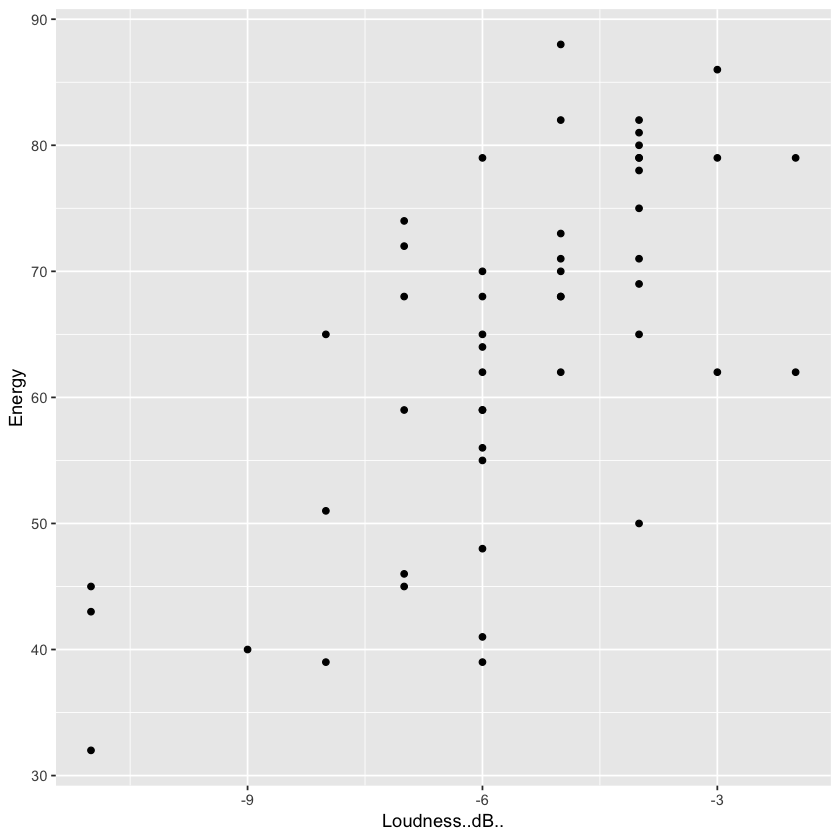

In [56]:
#import library for gglot2
library(ggplot2)

#plot
ggplot(data = df, mapping = aes(x = Loudness..dB.., y = Energy)) +
    geom_point()



In [57]:
summary(lm(Loudness..dB.. ~ Energy, data = df))


Call:
lm(formula = Loudness..dB.. ~ Energy, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4926 -0.8992  0.1327  0.5843  3.8597 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.86912    1.01455 -11.699 1.17e-15 ***
Energy        0.09693    0.01547   6.266 9.81e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.541 on 48 degrees of freedom
Multiple R-squared:   0.45,	Adjusted R-squared:  0.4385 
F-statistic: 39.27 on 1 and 48 DF,  p-value: 9.813e-08


As we can see, the correlation between `Loudness..dB..` and `Energy` is statistically significant.
We expect the more energetic the louder the song is. 

Seems it has good relation that why, we added a column has mean value of Loundness and Energy. 

### Plot 2: Histogram

Virsualize the frequency of popularity. 

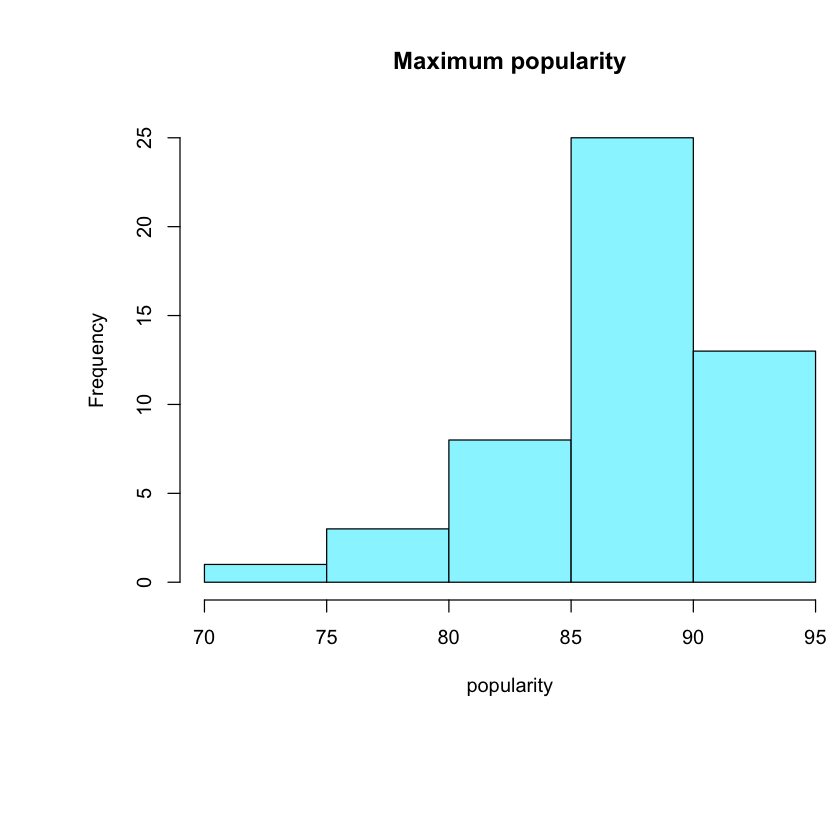

In [58]:
# histogram with added parameters

par(mai=c(2,1.5,1,0)) #change size

hist(df$Popularity,
main="Maximum popularity",
xlab="popularity",
col="cadetblue1"
)

With this histogram, we can see that the frequency of popularity is around 85 to 90.

### Plot 3 - bar

visualizing the popularity of Track.Name.

In [59]:
#Sort the popularity in descending order
sort_popularity_song <- df[order(-df$Popularity),]


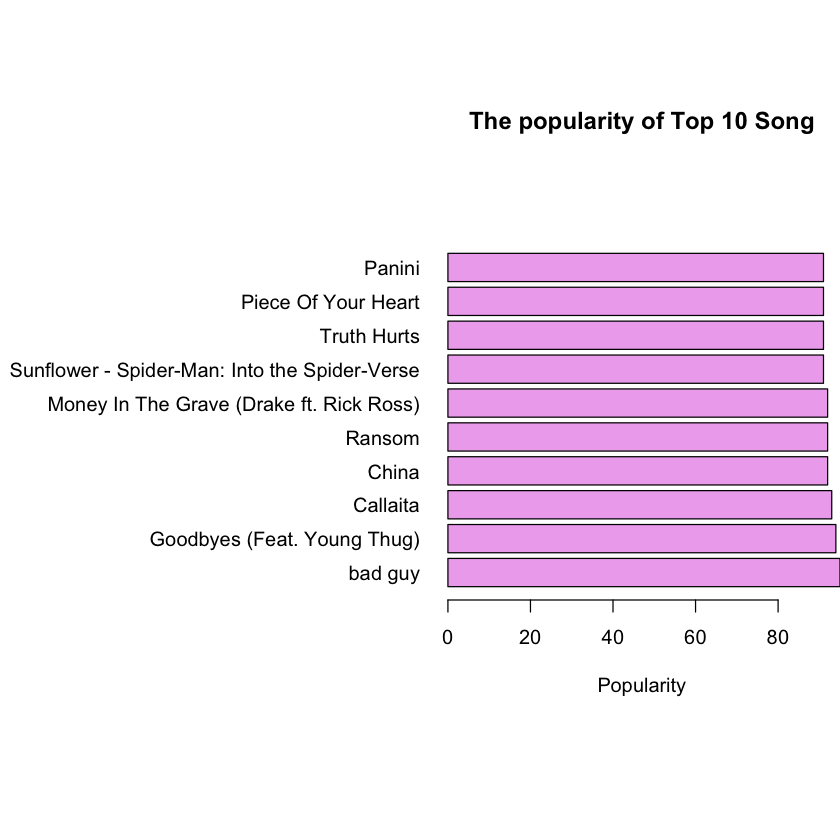

In [60]:
#Using bar plot 
par(mai=c(2,3.7,2,0))  

barplot(height= sort_popularity_song[1:10, 'Popularity'] , width = 0.01 ,  main="The popularity of Top 10 Song", xlab="Popularity", 
            names.arg = sort_popularity_song[1:10,'Track.Name'] , col="plum2", horiz=TRUE, las = 1)



This bar plot shows us the top 10 popularity songs. From this bar plot we gain that Bad guy is the song that in the first place, followed by Goodbyes, and so on. 

Now, I want to see the visualize of poluarity vs Artist.Name:

First of all, I will need to group their name first, then calculate the mean popularity of each artist. 

In [61]:
#import library
library(dplyr)

#group  
group_artist <- group_by(df, Artist.Name)


#calculate mean Popularity 
popularity_Artist <- summarise(group_artist, 
                                    mean_populaArtist = mean(Popularity))

#Decreasing order of mean_populaArtist column
sort_popularity_Artist <- data.frame(popularity_Artist[order(-popularity_Artist$mean_populaArtist),] )

sort_popularity_Artist

Artist.Name,mean_populaArtist
Bad Bunny,93.00
Post Malone,92.50
Anuel AA,92.00
Billie Eilish,92.00
Drake,92.00
Lil Tecca,92.00
Daddy Yankee,91.00
Lizzo,91.00
Lunay,91.00
MEDUZA,91.00


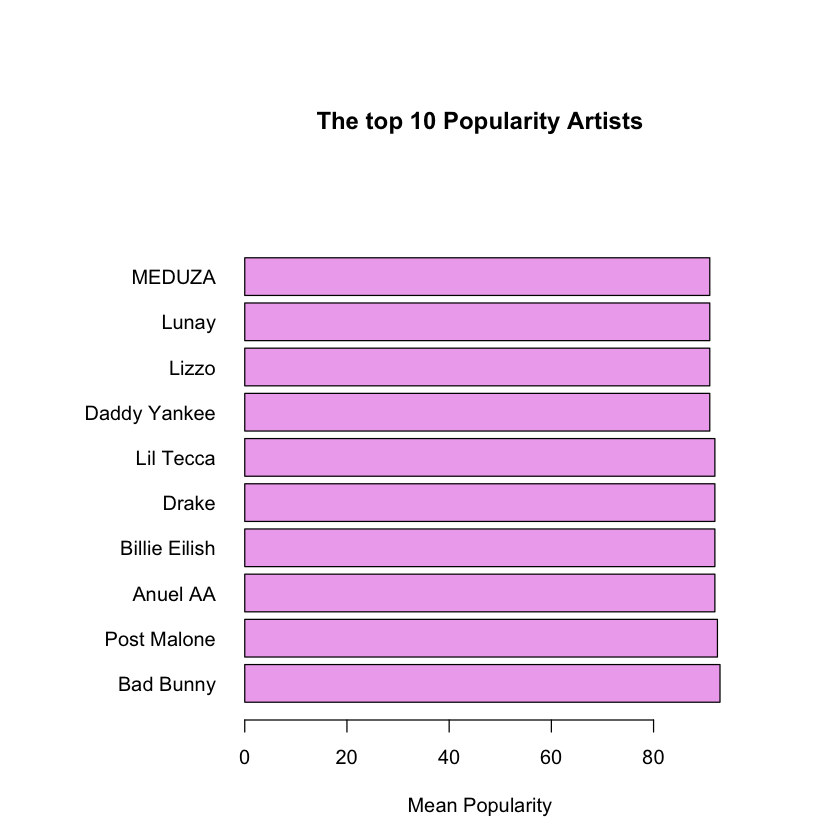

In [62]:
#Using bar plot 
par(mai=c(1,2,2,1))  

barplot(height= sort_popularity_Artist[1:10, 'mean_populaArtist'] , width = 0.01 ,  main="The top 10 Popularity Artists", xlab="Mean Popularity", 
            names.arg = sort_popularity_Artist[1:10,'Artist.Name'] , col="plum2", horiz=TRUE, las = 1)


The top 10 famoust Artists is shown clearly above bar chart.

### Plot 4 - Pie chart

- Firstly, Group the values of `Genre`. 
- Calculating the mean values of popolarity of those `Group_genre`, order them. Then, again group genre to have the general picture of them. For example, there are a lot of type of pops, our aim is to group them together. 

In [63]:
#group  
group_genre <- group_by(df, Genre)


#calculate mean Popularity of Group_gene
popularity_groupGenre <- summarise(group_genre, 
                                    mean_populaGenre = mean(Popularity))

#Decreasing order of mean_populaArtist column
sort_popularity_groupGenre <- popularity_groupGenre[order(-popularity_groupGenre$mean_populaGenre),] 

sort_popularity_groupGenre

Genre,mean_populaGenre
dfw rap,92.50000
electropop,92.00000
trap music,92.00000
escape room,91.00000
pop house,91.00000
reggaeton,91.00000
latin,89.80000
canadian hip hop,89.66667
atl hip hop,89.00000
big room,89.00000


In [64]:
#pop music
library(stringr)

#print out thhe index of different kinds of pop music
index_pop <- c(str_which(sort_popularity_groupGenre$Genre, 'pop') )

#take our their mean popularity values
pop <- as.vector(sort_popularity_groupGenre[index_pop, 'mean_populaGenre'])

#calculate the mean values  of popularity after group them. 
mean_populPop <- sum(pop)/count(pop)
mean_populPop
#index_pop

n
85.87245


In [65]:
#hiphop music
#print out thhe index of different kinds of hiphop music
index_hop <- c(str_which(sort_popularity_groupGenre$Genre, 'hop') ) #index of row contain 'hop'

#take our their mean popularity values
hop <- as.vector(sort_popularity_groupGenre[index_hop, 'mean_populaGenre'])

#calculate the mean values  of popularity after group them.
mean_populHop <- sum(hop)/count(hop)
mean_populHop

n
89.33333


In [66]:
#rap music index_rap: 1, 11
rap <- as.vector(sort_popularity_groupGenre[c(1,11), 'mean_populaGenre'])
mean_populRap <- sum(rap)/count(rap)
mean_populRap

n
90.75


In [67]:
library(tidyverse)
#creat a new table of genre vs mean popularity values 
group_Allgenre <- sort_popularity_groupGenre[c( 3, 4, 6, 7, 10, 13, 14, 15,16),] %>% add_row( 
    Genre = c('pop', 'rap', 'hiphop'), mean_populaGenre = c(85.87245, 90.75, 89.33333)) #add 3 new rows

group_Allgenre                                               

Genre,mean_populaGenre
trap music,92.00000
escape room,91.00000
reggaeton,91.00000
latin,89.80000
big room,89.00000
brostep,88.00000
r&b en espanol,88.00000
reggaeton flow,87.50000
edm,86.66667
pop,85.87245


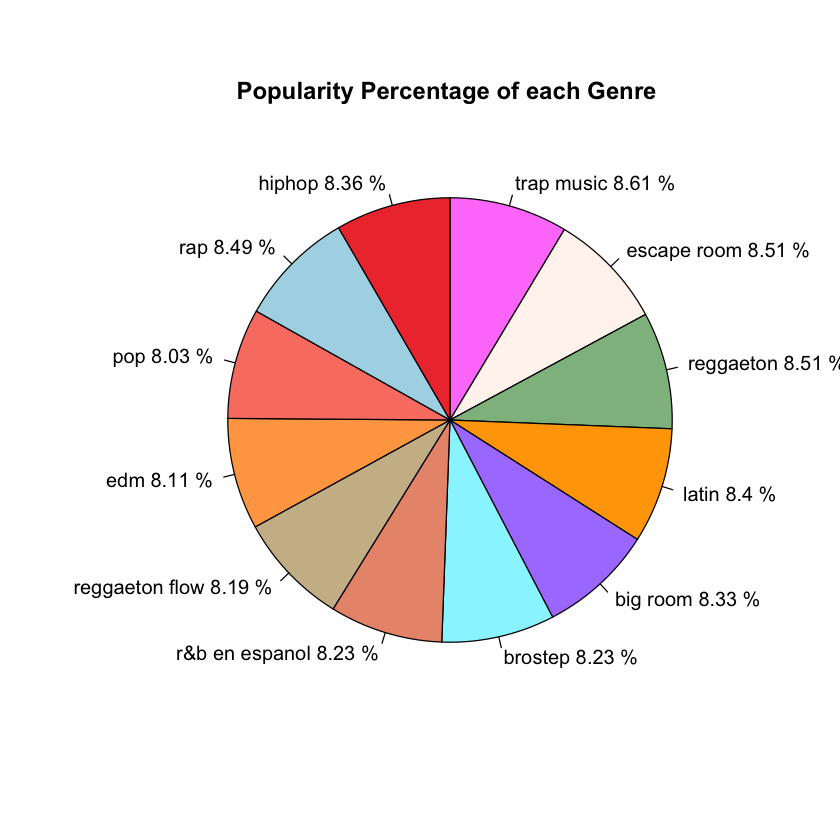

In [68]:
par(mai=c(1.5,1.5,1.5,1)) 

#percentage of each genre
pct = (group_Allgenre$mean_populaGenre/ sum(group_Allgenre$mean_populaGenre))*100 
pct = round(pct,2)

#label 
labels = c(group_Allgenre$Genre)
labels = paste(labels,pct, "%")

#color 
col = c("orchid1", "seashell", "darkseagreen","orange","mediumpurple1", "cadetblue1", 'darksalmon', 'wheat3', 
        'tan1', 'salmon', 'lightblue', 'brown2' )
#pie chart
pie(pct, col = col,  radius = 1, init.angle = 90, clockwise = TRUE, 
    labels =labels, main = "Popularity Percentage of each Genre ")

# C. Linear Regression <a class="anchor" id="C"></a> 

## 6. Explore Correlations  <a class="anchor" id="explore"></a> 


In [69]:
#correlation martrix
cor(df[, 5:16])

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,beats,mean_Loudness_energy
Beats.Per.Minute,1.00000000,0.04375559,-0.0941828916,0.01701619,-0.16728576,-0.011585816,-0.1392883997,-0.031449597,0.557051878,0.19609692,0.744079125,0.04193113
Energy,0.04375559,1.00000000,0.0182535758,0.67079357,0.16276771,0.438819586,0.2246768064,-0.339891653,-0.089859668,-0.08029497,0.173300260,0.99526173
Danceability,-0.09418289,0.01825358,1.0000000000,0.01625454,-0.14963620,0.172828977,-0.0001852976,-0.098165377,-0.103471922,-0.07141325,-0.078746266,0.01869283
Loudness..dB..,0.01701619,0.67079357,0.0162545370,1.00000000,0.25865203,0.237613800,0.2192187407,-0.138299607,-0.272212633,-0.04308543,0.168343094,0.73972680
Liveness,-0.16728576,0.16276771,-0.1496362023,0.25865203,1.00000000,0.016123467,0.1317823354,0.021328241,-0.125286062,0.09256423,-0.070343941,0.18159231
Valence.,-0.01158582,0.43881959,0.1728289768,0.23761380,0.01612347,1.000000000,-0.0177817772,-0.052323306,-0.053241746,-0.31775236,0.003343204,0.42930106
Length.,-0.13928840,0.22467681,-0.0001852976,0.21921874,0.13178234,-0.017781777,1.0000000000,-0.076292690,0.046755261,-0.08763886,0.534949935,0.23259373
Acousticness..,-0.03144960,-0.33989165,-0.0981653774,-0.13829961,0.02132824,-0.052323306,-0.0762926901,1.000000000,0.008293376,-0.03468404,-0.049842430,-0.32652150
Speechiness.,0.55705188,-0.08985967,-0.1034719217,-0.27221263,-0.12528606,-0.053241746,0.0467552609,0.008293376,1.000000000,0.23855303,0.507513121,-0.11721935
Popularity,0.19609692,-0.08029497,-0.0714132526,-0.04308543,0.09256423,-0.317752363,-0.0876388589,-0.034684041,0.238553032,1.00000000,0.111016428,-0.07850175


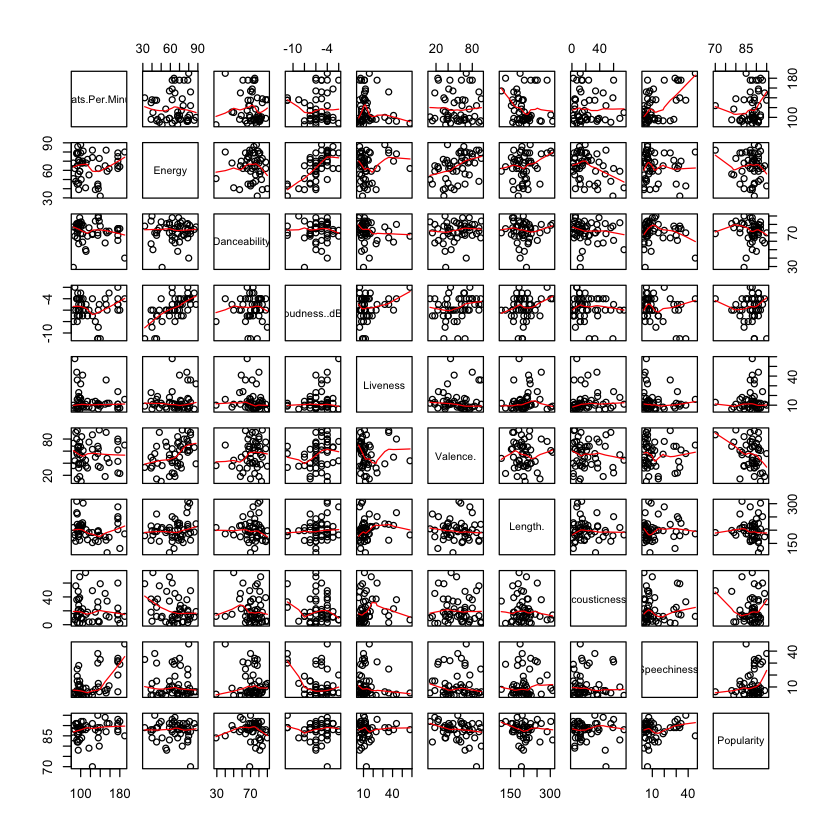

In [70]:
#plot the correlation 
pairs(df[, 5:14], panel = panel.smooth)

To see the correlation between the variable, we can look at the correlation matrix and the figure above. We observe several good relations between `Popularity` and other variables such as  `Valence., Speechiness., Liveness, mean_Loudness_energy`, etc. Moreover, not only the relationship between `Popularity` with different independent variables should be compared, but also the correlation between independent variables themselves should be taken into account.  
Detail analysis will be disscuss more in each type of models. 

## 7. Response Variable <a class="anchor" id="response"></a> 


The aim of this emission is to find out what factors effects the popularity of a song. Thus, we choose `Popularity 
` as our response variable in this case. 

Although this is not strictly a continuous variable, the number of wireless segmentation for this variable does not have practical significance. But it's also an ordered ranking variable, and to some extent a numerical variable. This value represents the popularity of the song. The higher the number, the more popular the song.

We  hope to use this variable as the predicted variable and explore the relationship between this variable and other song features. 

## 8. Simple Linear Regression  <a class="anchor" id="simple"></a> 
Using the correlation table above, we can choose some in explanatory variables that have good collerations with our response,`Popularity`, to buil a predict models. 

### SLR Model 1

In [71]:
#use lm() to build model 1
model1 <- lm(Popularity ~ Valence., data = df)

summary(model1)


Call:
lm(formula = Popularity ~ Valence., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4298  -1.5951   0.5352   2.5935   7.5895 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 90.98872    1.62114  56.126   <2e-16 ***
Valence.    -0.06390    0.02752  -2.322   0.0245 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.303 on 48 degrees of freedom
Multiple R-squared:  0.101,	Adjusted R-squared:  0.08224 
F-statistic: 5.391 on 1 and 48 DF,  p-value: 0.02453


Noticeably, the  **intercep = 90.98872** and the **slope = -0.06390**.
The slope now is negative, which means that the two variables have the negative correlation. 

The prediction function now becomes: 

$$ Popularity  = 90.98872 + ( -0.06390 \times Valence.) $$


Together, the **R-square = 0.101**  and the **p-value = 0.02453**, which  indicates that there is moderate correlation between `Valence.` and `Popularity`.  In other words, `Valence.` is a moderate predictor for the dependent variable,`Popularity`. 

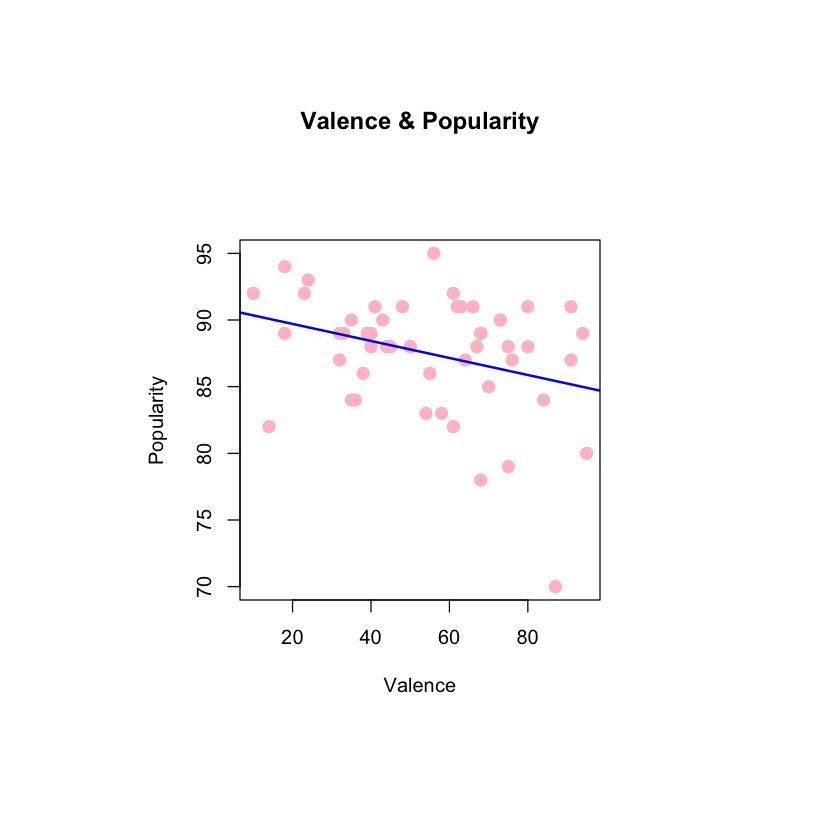

In [72]:
#plot 
par(mai=c(2,2,2,2))
plot(df$Valence., df$Popularity, col='pink', pch=20, cex=2, 
     main="Valence & Popularity", 
     xlab="Valence", ylab="Popularity")

abline(model1, col = 'blue', lwd = 2)

 ### SLR Model 2

In [73]:
model2 <- lm(Popularity ~ Speechiness., data = df)
summary(model2)


Call:
lm(formula = Popularity ~ Speechiness., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.878  -1.900   1.026   2.894   7.026 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.30198    0.94019  91.792   <2e-16 ***
Speechiness.  0.09600    0.05641   1.702   0.0952 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.407 on 48 degrees of freedom
Multiple R-squared:  0.05691,	Adjusted R-squared:  0.03726 
F-statistic: 2.896 on 1 and 48 DF,  p-value: 0.09525


The prediction function now becomes: 

$$ Popularity  = 86.30198 + (0.09600 \times Speechiness.) $$


Together, the **R-square = 0.05691**  and the **p-value = 0.09525**, which  indicates that there is weak correlation between `Speechiness.` and `Popularity`. 

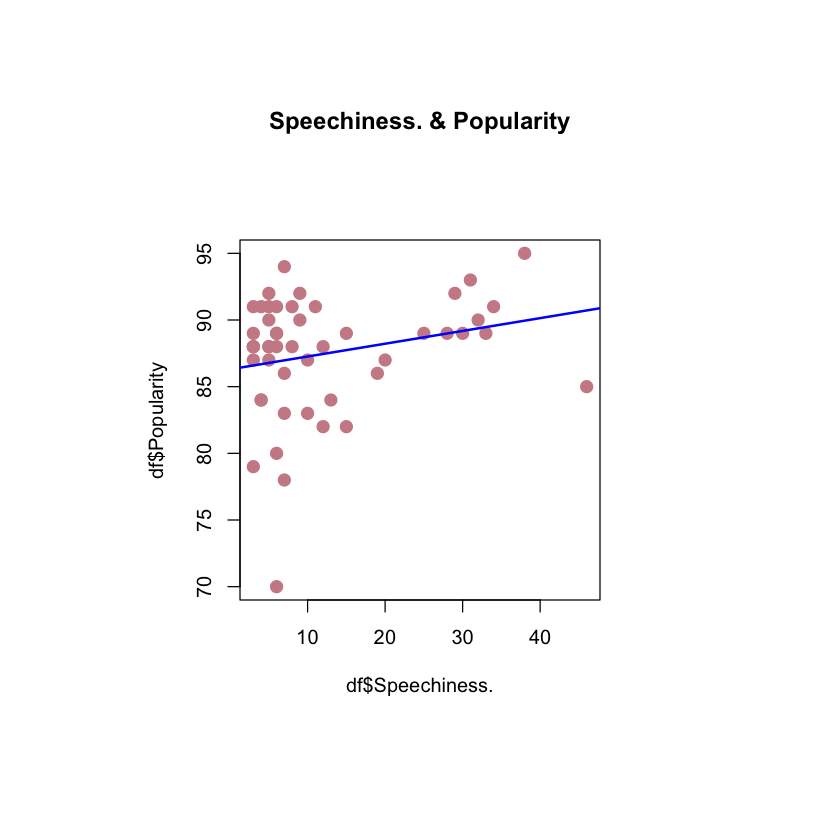

In [74]:
par(mai=c(2,2,2,2))
plot(df$Speechiness., df$Popularity, col='lightpink3', pch=20, cex=2, 
     main="Speechiness. & Popularity" 
    )

abline(model2, col = 'blue', lwd = 2)


### SLR Model 3

In [75]:
#use lm() to build model 2
model3 <- lm(Popularity ~ Beats.Per.Minute, data = df)

summary(model3)


Call:
lm(formula = Popularity ~ Beats.Per.Minute, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.612  -1.924   1.015   2.504   7.074 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      84.07766    2.54902  32.984   <2e-16 ***
Beats.Per.Minute  0.02851    0.02057   1.385    0.172    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.45 on 48 degrees of freedom
Multiple R-squared:  0.03845,	Adjusted R-squared:  0.01842 
F-statistic:  1.92 on 1 and 48 DF,  p-value: 0.1723


The prediction function now becomes: 

$$ Popularity  = 84.07766  + (  0.02851 \times Beats.Per.Minute) $$


Together, the **R-square = 0.03845**  and the **p-value = 0.1723**, which  indicates that there is no correlation between `Beats.Per.Minute` and `Popularity` because its p-values is larger than 0.1. 

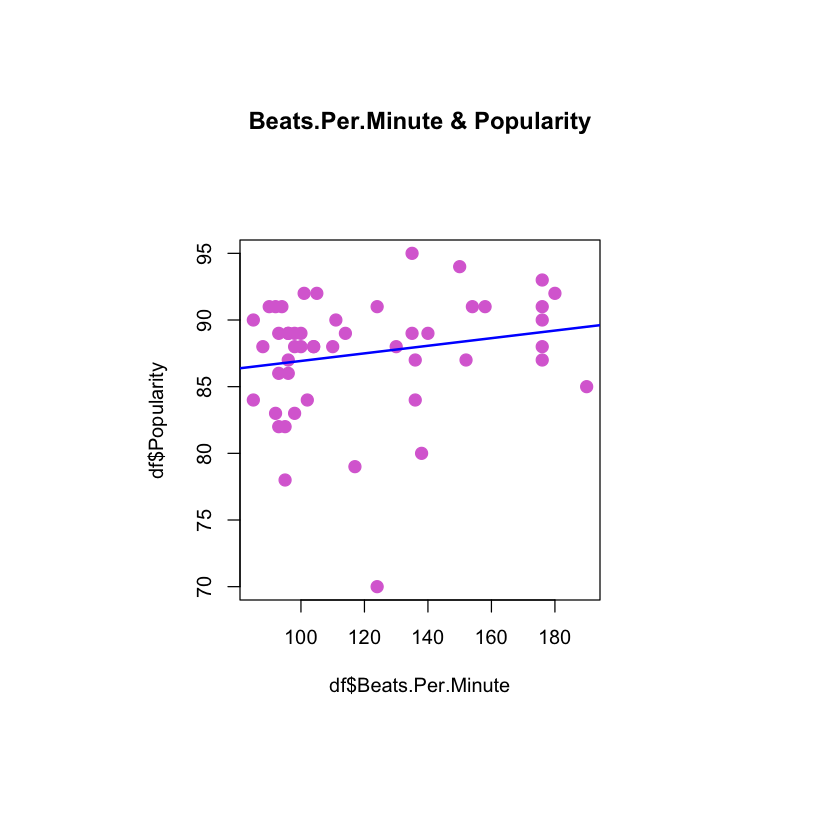

In [76]:
par(mai=c(2,2,2,2))
plot(df$Beats.Per.Minute, df$Popularity, col='orchid', pch=20, cex=2, 
     main="Beats.Per.Minute & Popularity" 
    )

abline(model3, col = 'blue', lwd = 2)


### SLR Model 4

In [77]:
#use lm() to build model 4
model4 <- lm(Popularity ~ Liveness, data = df)

summary(model4)


Call:
lm(formula = Popularity ~ Liveness, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4379  -1.4590   0.7255   2.7771   7.6743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.95181    1.06432  81.697   <2e-16 ***
Liveness     0.03739    0.05806   0.644    0.523    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.519 on 48 degrees of freedom
Multiple R-squared:  0.008568,	Adjusted R-squared:  -0.01209 
F-statistic: 0.4148 on 1 and 48 DF,  p-value: 0.5226



Obviously, no correlation between Popularity and Liveness since p-value, 0.5226, which is too large. 

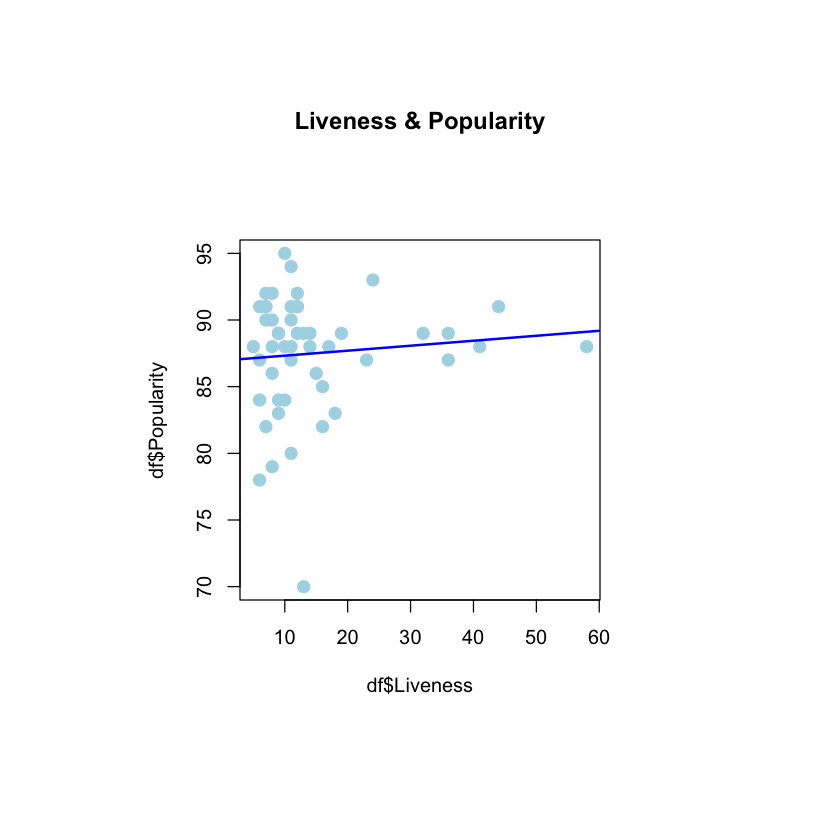

In [78]:
par(mai=c(2,2,2,2))
plot(df$Liveness, df$Popularity, col='lightblue', pch=20, cex=2, 
     main="Liveness & Popularity" 
    )

abline(model4, col = 'blue', lwd = 2)


### SLR Model 5

In [79]:
#use lm() to build model 4
model5 <- lm(Popularity ~ mean_Loudness_energy, data = df)

summary(model5)


Call:
lm(formula = Popularity ~ mean_Loudness_energy, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0594  -1.4753   0.7213   2.9994   6.9066 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          88.81274    2.48983  35.670   <2e-16 ***
mean_Loudness_energy -0.04496    0.08241  -0.546    0.588    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.524 on 48 degrees of freedom
Multiple R-squared:  0.006163,	Adjusted R-squared:  -0.01454 
F-statistic: 0.2976 on 1 and 48 DF,  p-value: 0.5879


Same as model 4, there is no correlation between Popularity and mean_Loudness_energy.

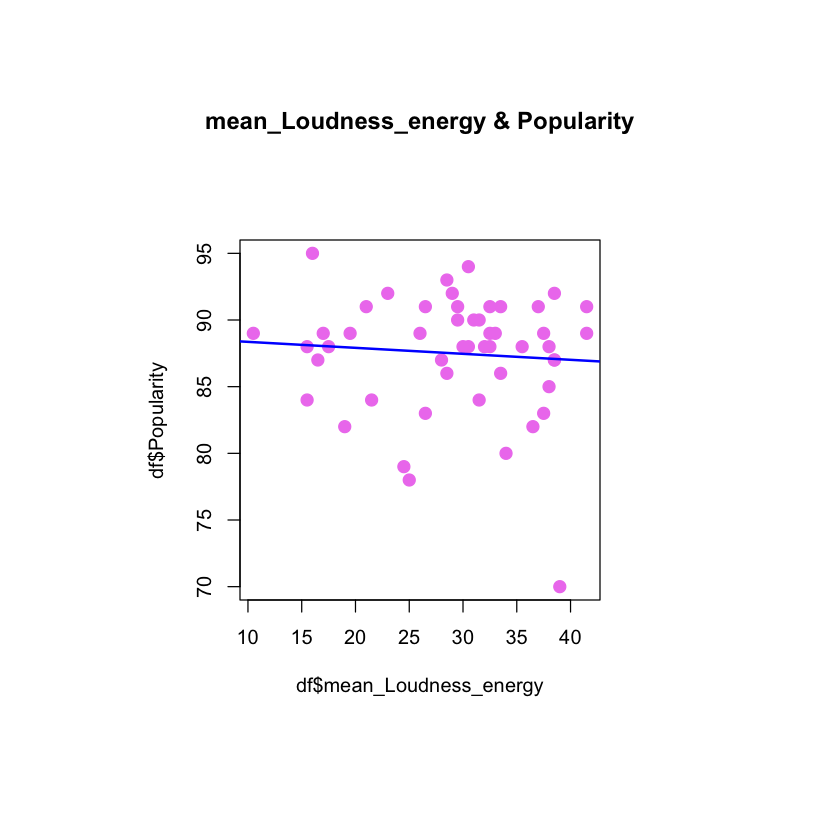

In [80]:
par(mai=c(2,2,2,2))
plot(df$mean_Loudness_energy, df$Popularity, col='violet', pch=20, cex=2, 
     main="mean_Loudness_energy & Popularity" 
    )

abline(model5, col = 'blue', lwd = 2)


####  Comparing 5 SPL models

In [81]:
#create a table concluding p_values and R^2 of 5 models
SLG_model<- data.frame( model = c(1, 2,3 ,4 ,5),
                        R_square = c(summary(model1)$r.squared,
                                     summary(model2)$r.squared,
                                     summary(model3)$r.squared, 
                                     summary(model4)$r.squared, 
                                     summary(model5)$r.squared), 
                       
                        P_value = c(anova(model1)$'Pr(>F)'[1], #take out the p-values
                                    anova(model2)$'Pr(>F)'[1],
                                    anova(model3)$'Pr(>F)'[1], 
                                    anova(model4)$'Pr(>F)'[1],
                                    anova(model5)$'Pr(>F)'[1])
                       )

#order the data to compare
sort <- SLG_model[order(-SLG_model$R_square), ]
sort

model,R_square,P_value
1,0.100966564,0.02453491
2,0.056907549,0.09524769
3,0.038454001,0.17230443
4,0.008568137,0.52259660
5,0.006162525,0.58789513


From the table above, we can tell that the model has the **best colleration** is **model one** (`Valence.` and `Popularity`), it has very much larger R_quare, $0.101$  values and very small P_value, $0.024$ than that in other models. 

##  9. Multiple Linear Regression  <a class="anchor" id="multiple"></a> 
Try now to, again, predict the weekly sales, but using more than one variable. Try different scenarios, compare your models and pick the best. Explain in words the interpretation of each of your models. Compare the multiple regression result with the simple regression result.


Since form part 8, we can see that model 1 (`Valence.` & `Popularity`) shows a good predictation. Thus, I will chose those variable to build my **Multiple Linear Regression(MLR)** with more than one independent variables. 

However, before going to add some new variables I need to check again the **colleration** between these **independent variables** as well. 

In [82]:
cor(df[, c('Popularity',
               'Valence.',
               'Speechiness.' ,
               'Liveness', 
              'mean_Loudness_energy')]
   )

,Popularity,Valence.,Speechiness.,Liveness,mean_Loudness_energy
Popularity,1.00000000,-0.31775236,0.23855303,0.09256423,-0.07850175
Valence.,-0.31775236,1.00000000,-0.05324175,0.01612347,0.42930106
Speechiness.,0.23855303,-0.05324175,1.00000000,-0.12528606,-0.11721935
Liveness,0.09256423,0.01612347,-0.12528606,1.00000000,0.18159231
mean_Loudness_energy,-0.07850175,0.42930106,-0.11721935,0.18159231,1.00000000


Form the table above, we obtain that  `Valence.` and	`Speechiness.` have pretty good correlation to `Popularity`. Especially, `Valence.` and	`Speechiness.` do not have corralation to each other. 

If our explanatory variables depend each others, which does not give the unique effect in the response variable. 
Therefore, `'Speechiness'` will be our second independent variable to add to MLR model. 

### Model 6

In [83]:
model6 <- lm(Popularity ~  Speechiness. + Valence., data = df)

summary(model6)


Call:
lm(formula = Popularity ~ Speechiness. + Valence., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9273  -1.9393   0.7573   2.4211   6.4082 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  89.74257    1.76264  50.914   <2e-16 ***
Speechiness.  0.08944    0.05419   1.651   0.1055    
Valence.     -0.06152    0.02708  -2.272   0.0277 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.228 on 47 degrees of freedom
Multiple R-squared:  0.1502,	Adjusted R-squared:  0.1141 
F-statistic: 4.154 on 2 and 47 DF,  p-value: 0.02181


### Model 7
Let's add one more independent variable to see what will happen!

In [84]:
model7 <- lm(Popularity ~ Speechiness. + Valence. + Liveness , data = df)

summary(model7)


Call:
lm(formula = Popularity ~ Speechiness. + Valence. + Liveness, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7926  -1.7350   0.7529   2.2479   6.8590 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  88.92180    1.96971  45.145   <2e-16 ***
Speechiness.  0.09584    0.05468   1.753   0.0863 .  
Valence.     -0.06176    0.02711  -2.278   0.0274 *  
Liveness      0.05145    0.05482   0.938   0.3529    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.233 on 46 degrees of freedom
Multiple R-squared:  0.1662,	Adjusted R-squared:  0.1118 
F-statistic: 3.056 on 3 and 46 DF,  p-value: 0.03758


### Comparing the MLR models

In [85]:
#collect data of model 5.1, 5.2, 5.3

MLR_model<- data.frame( model = c(6, 7),
                        R_square = c(summary(model6)$r.squared,
                                     summary(model7)$r.squared), 
                       
                        Adjusted_Rsquare = c(summary(model6)$adj.r.squared,
                                             summary(model7)$adj.r.squared)
                                      )
MLR_model

model,R_square,Adjusted_Rsquare
6,0.1502284,0.1140679
7,0.1661914,0.1118126


Looking at the **R_squared** it may say that model 7 is the best one because its R-square is closer to 1 than model 6. However, the more independent variable we add, the  R-square values will increase more, which is misleading because some assed variables might be useless with minimal significance.
In other words, it is possiblefor a model has too many predictors, it begins to model the random noise in the data. Therefore, in this case, we should look as the **Adjusted R-squared** as well because, the adjusted R-squared grows up only if the new predictors improves the model.


In our case, comparing **model 6**, and the **Adjusted R-squared** values of **model 7** decreases, which mean it is not good. Now, we can confidently say that, model 6 is a better model. 

### Comparing SLG model vs MLG model

In [86]:
#model 1 vs model 6

compare_models <- data.frame( model = c(1, 6),
                        R_square = c(summary(model1)$r.squared,
                                  
                                     summary(model6)$r.squared 
                                     ), 
                       
                        Adjusted_Rsquare = c(summary(model1)$adj.r.squared,
              
                                     summary(model6)$adj.r.squared 
                                     ),

                        P_value = c(anova(model1)$'Pr(>F)'[1], #take out the p-values
                                  
                                    0.03758
                                    ) )
compare_models

model,R_square,Adjusted_Rsquare,P_value
1,0.1009666,0.0822367,0.02453491
6,0.1502284,0.1140679,0.03758000


After all, we can see that the model 6 have higher values of R-squared and adjusted R-squared. Thus, We can say that **Model 6** (``Popularity & Valence. + Speechiness.``) is the best model in our analysis. 



#### Checking model with real values - choosing Lady Gaga

Here is  **model 6**: 

$$ Polularity  = 89.74257 -(0.06152 \times Valence.) +  (0.08944 \times Speechiness.) $$

In [87]:
#Check values popularity of Lady Gaga by our model with Valence. = 32, speechness = 3 
# yhat = 89.74257 -0.06152 * Valence. +  0.08944 Speechiness.
predict <- function(val, speech){
    y_hat = 89.74257 - (0.06152 * val) +  (0.08944 * speech)
    print(y_hat)
}

predict(32, 3)

[1] 88.04225


#### Comapring to the actual poplarity value of Lady Gaga, 87, our the result a bit higher but still pretty good, 88.  

### Checking assumping model 6

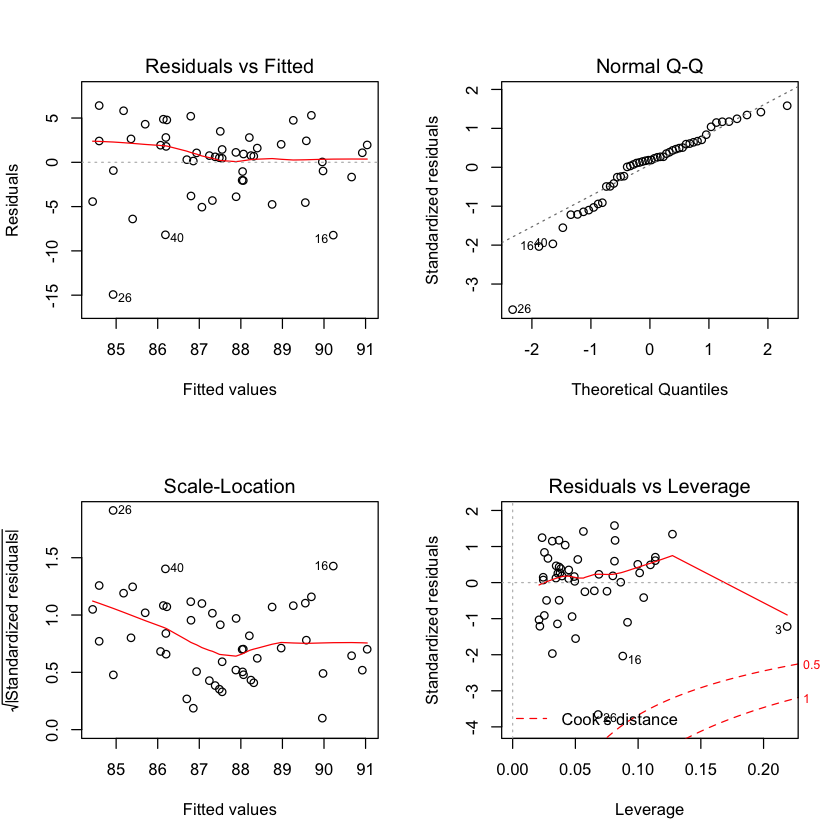

In [88]:
#checking model # diagnostic plot
par(mfrow=c(2,2))   
plot(model6)

- Linear relationship: the correlation cofficients tell us that our independent variables has a linear relationship with the dependent variable. 

- Equal Error Variance: Looking at the **Residuals vs Fitted** plot, we can see that there is no pattern which is data is good to use. 

- Independent Observation: checking the same plot **Residuals vs Fitted**, there is no correlation. 

- Normality of Error:  checking Q-Q plot. we can see the dot(residuals)is close to the line which means they are normal, except for some dots pretty far form the line. 

After all, we are good to use our model 6!

# D. Findings  <a class="anchor" id="D"></a> 


## 10. Project Report  <a class="anchor" id="project"></a>


# <font size =18> <center> <span style="color:blue"> Music Report</span> <center> </font>

    
From group:
    
- Chang Liu
- ZiHeng Chen
- Xuan Thi Ngo 
    
To: 
    
**Universal Music Group** (USA based) <br>
    
    
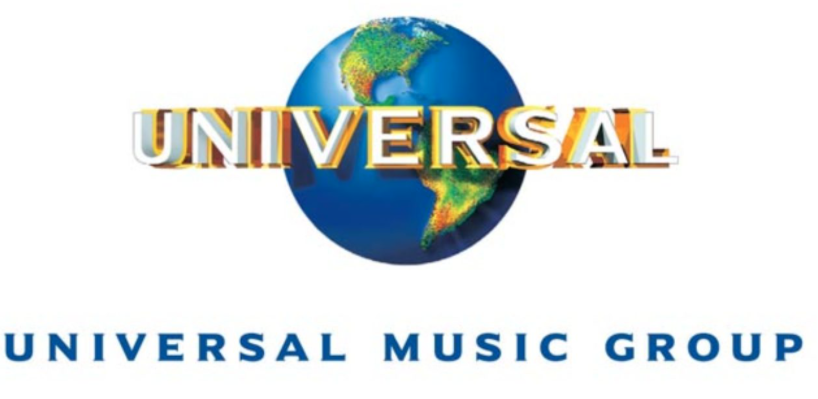
    


<font size =6>  Introduction  </font>
    
As the world is approaching the data age,the data on music are too big to estimate. We focus on using **Top 50 songs** data to build a model that predicts the trend of the songs in the future. The results will be provide your company an idea of what factors are involved in good musical work. Form that idea they can have good picture of how to compose a song and make it become a hit in `Spotify`.  


In this project, we will analyze the data named top50.csv. The dataset displaces the top 50 most listened songs in 2019 in the world by Spotify. The dataset contains detailed information about each song, such as genre, valance, length, etc. 
    
<font size =6>  Progress of Building the Model </font>    

* First step: Choosing dependent variable: **Popularity**: this value represents the popularity of the song. The higher the number, the more popular the song. The aim of this report is to find out what factors effects the popularity of a song. Thus, we choose popularity as our reference object in this case. We hope to use this variable as the predicted variable and explore the relationship between this variable and other song features.
    
* Secondly, we simply use the variable popularity to relate to the most intuitive features.
    

 Top 10 Artists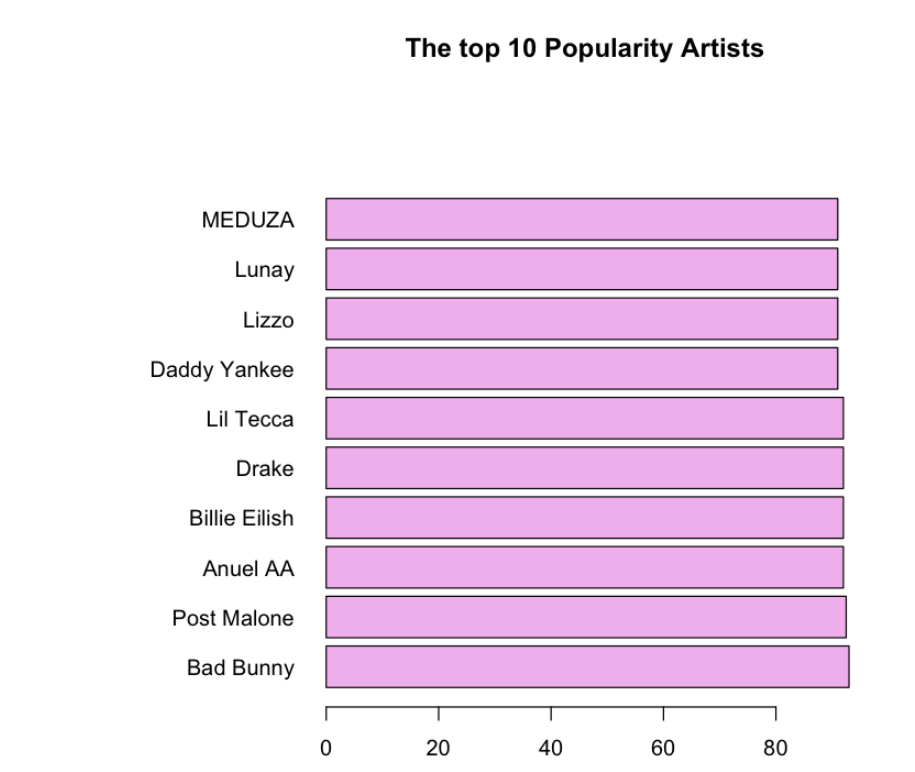
   


* Then, we summarize and average genres, because we find that many genres are different categories of the same faction. Using variable popularity to sort the genres, we conclude that the top three most popular genres are trap music, escape room and reggaeton.
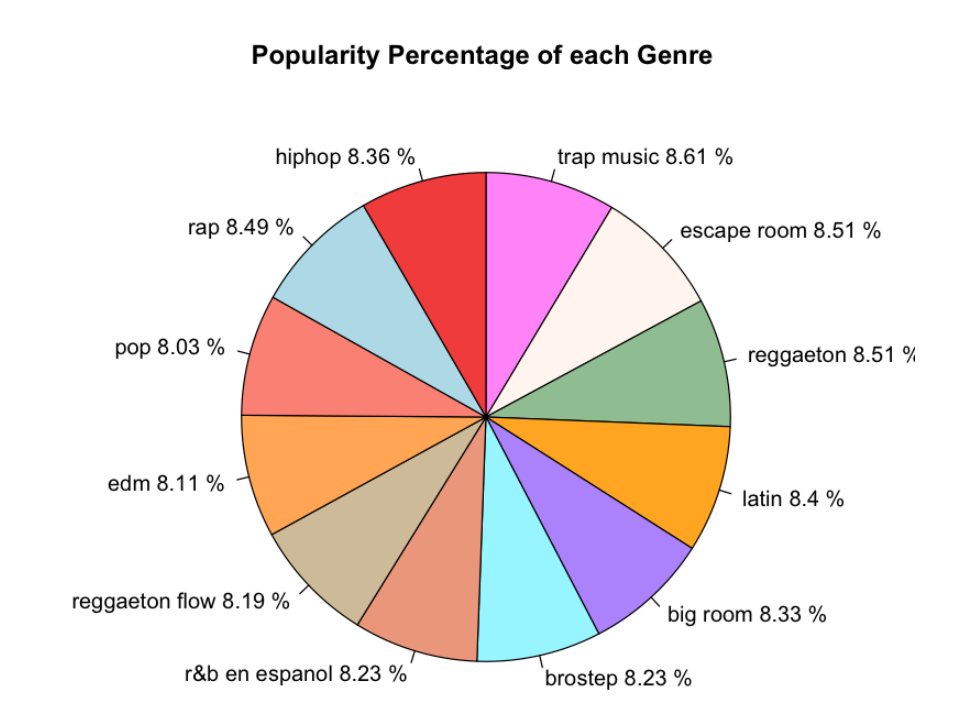

The pie chart shows that the popularity of different genres is evenly distributed.
    


* 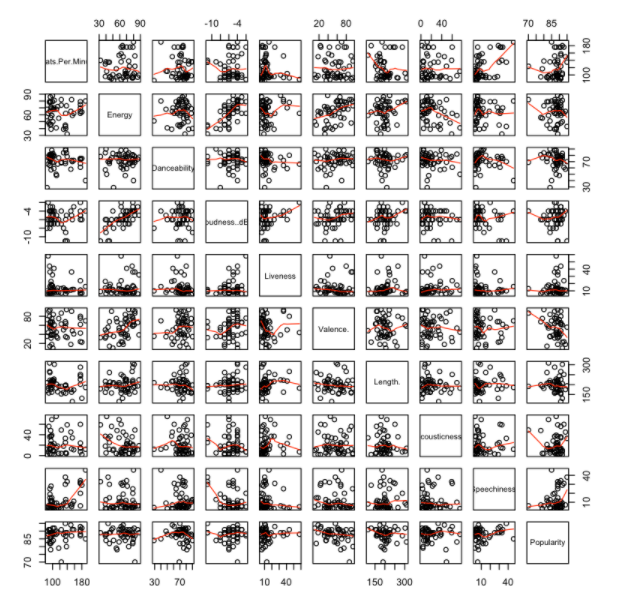To see the correlation between the variable, we can look at the correlation matrix and the figure above. We observe several good relations between Popularity and other variables such as  Valence., Speechiness., Liveness, mean_Loudness_energy, etc. Moreover, not only the relationship between Popularity with different independent variables should be compared, but also the correlation between independent variables themselves should be taken into account.


* Buildind Simple Linear Regression Models: in order to better analyze the correlation between popularity and other variables, we conduct a simple linear regression. It means we can choose some in explanatory variables that have good correlation with our response, Popularity, to buil a predict models. By comparing different models, we can tell that the model has the best correlation is model one ,Popularity vs Valen,(R-square = 0.101 and the p-value = 0.02453). It indicates that there is moderate correlation between Valence and Popularity. 
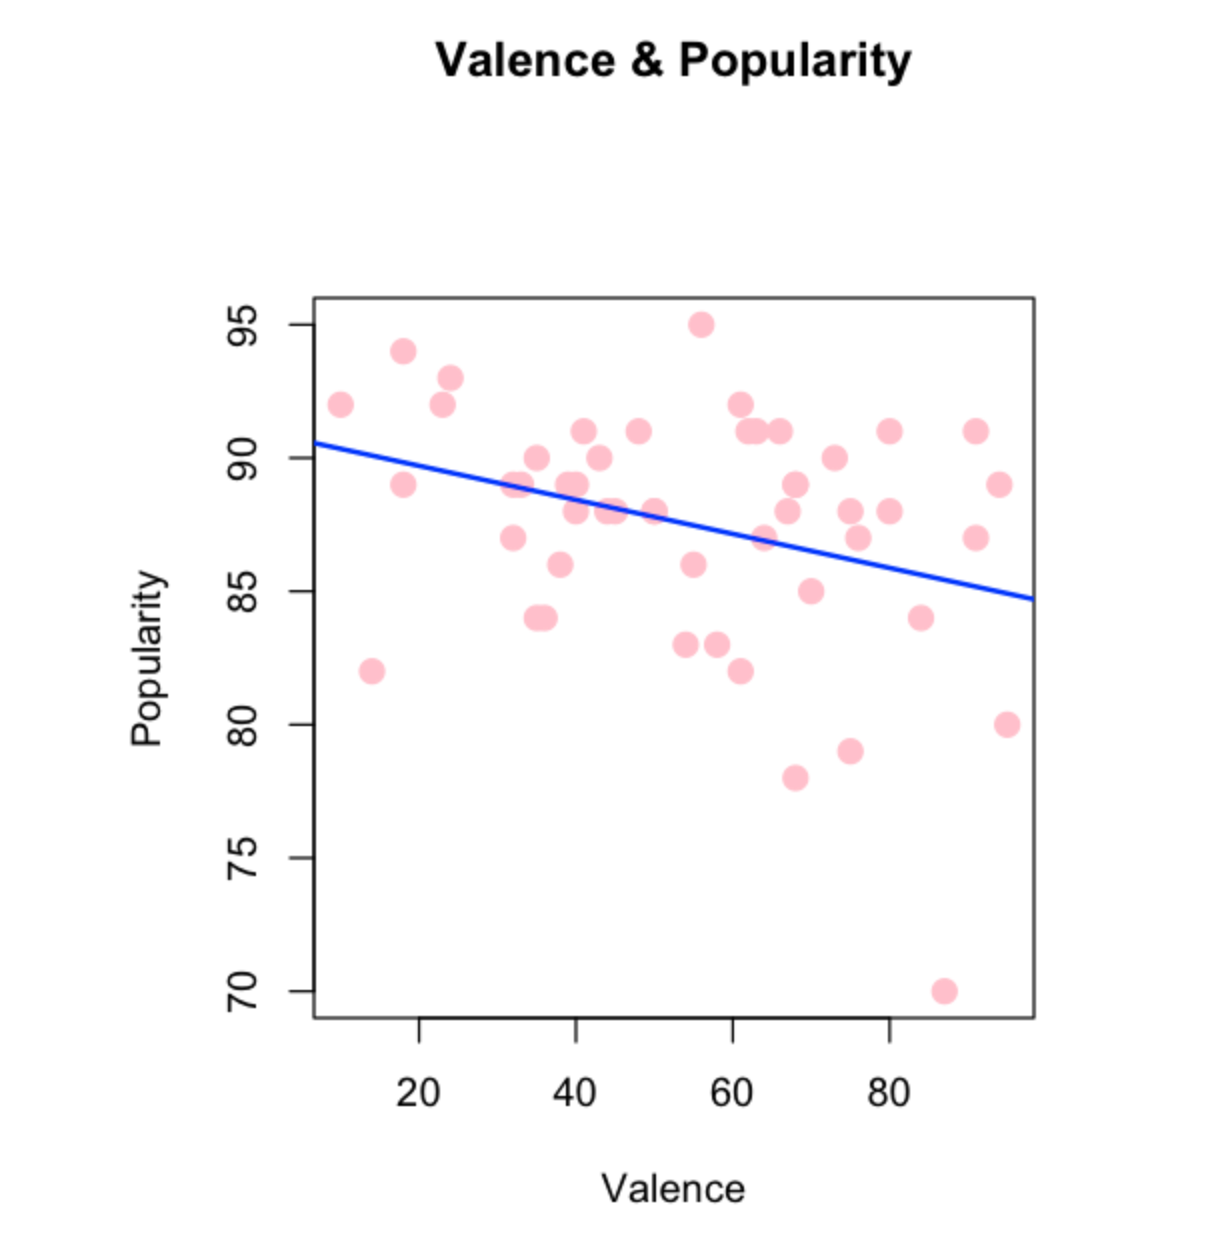

It tell us that the Popularity has negative correlation with Valence. $10.1\%$ increase of Valence leads to the decrease of Popularity.  

* Building Multiple Linear Regression: we can see that model 1 (Valence. & Popularity) shows the right prediction. Thus, we will choose those variables to build Multiple Linear Regression(MLR) with more than one independent variable. The results show that when the variables are Valence and Speechiness, the model is more significant and has a higher correlation with popularity. So we can say model 6 is better.
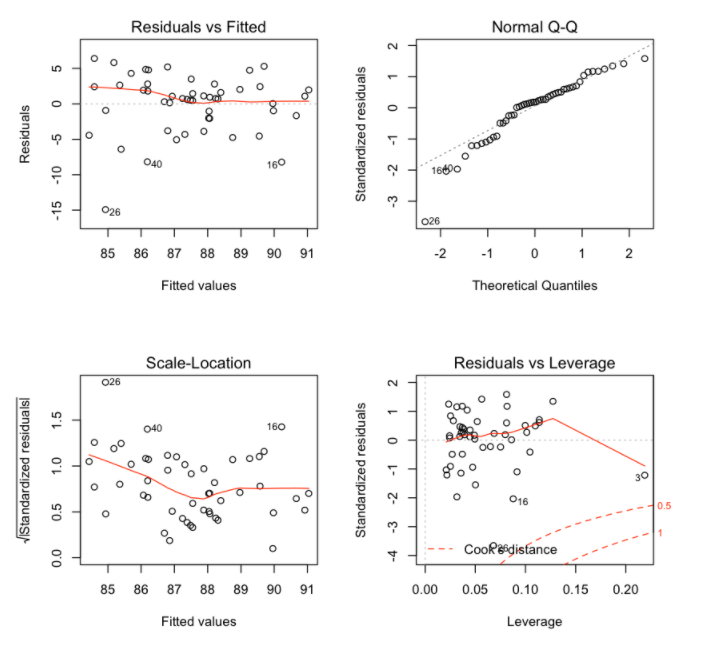


<font size =6>  Results and Discussions </font>
    
* Compare model 6 with model 1, we can see that model 6 has higher R-squared values and adjusted R-squared. Thus, We can say that Model 6 is the best in our analysis. Finally, we are checking assuming on model 6. The correlation coefficients tell us that our independent variables have a linear relationship with the dependent variable. The residuals conform to normal distribution. 


* After all, we can see that model 6 has higher R-squared values and adjusted R-squared. Thus, We can say that **Model 6** (``Popularity & Valence. + Speechiness ``), $R-squared = 0.1502284$  and $Adjusted R-Squared = 0.1140679$, is the best model in our analysis. The model is: 



$$ Polularity  = 89.74257 -(0.06152 \times Valence.) +  (0.08944 \times Speechiness.) $$

This model means a positive correlation between Popularity & Speechiness and a Negative correlation between Popularity & Speechiness. In other words, it means that around $15\%$ increase in popularity is affected by mostly the decrease of Valence and increase of Speechiness.     


* From this report, we can conclude that to have a better rate of popularity of your songs, you may look at the two features: **valence and Speechiness**. Decreasing the valence and increasing the music's speeches may lead to an increase in your songs' popularity - this assumption accurate up to $15\ % $. Moreover, we can see except for valence and Speechiness; there is no significant correlation between popularity and other variables. Thus, we recommend that when making music, you don't need to overthink about other features excepted for **valence and Speechiness** because they are not the main factors affecting the popularity of songs.

## E. Originality

"Similar published works for linear regression found with same dataset". There are some similar use of linear regression for this data but their results is different from us. 



https://www.kaggle.com/suddhasatwa/spotify-top-50-data-analysis


This report was found to have the same task as our model but using python. Their model first found that the features Accousticness and Speechiness of a song contribute most to the Popularity of the music,however, after fixing their draft model,  his model shows that **Accousticness and Speechiness** is highly positively correlated with the Popularity of the song. In contrast, the **Valence and Length** of the music reduces the Popularity of the song. Whereas, our model focuses on Valence and Speechiness because it contributes to the change of Popularity than other features.  